# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [7]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Apply your model to the train set

#### Importing and initializing the model class

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

#### Fitting the model to the train data

In [18]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions on the train set, and on the test set

In [19]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### Calculating your residuals

In [20]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [21]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Training MSE:', train_mse)
print('Testing MSE:', test_mse)

Training MSE: 20.102849826203812
Testing MSE: 25.694857084430563


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [34]:
split_sizes = np.linspace(0.05,0.95,19)
split_sizes

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

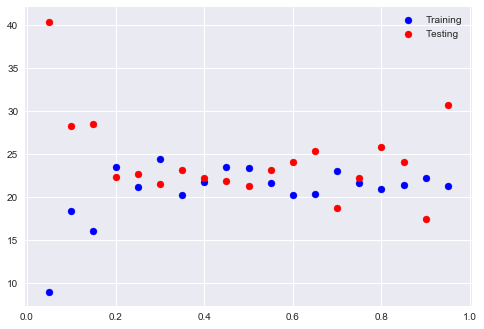

In [35]:
import matplotlib.pyplot as plt

train_mse_splits = []
test_mse_splits = []

for split in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-split)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    #print('Training MSE:', train_mse)
    train_mse_splits.append(train_mse)
    #print('Testing MSE:', test_mse)
    test_mse_splits.append(test_mse)
    
plt.style.use('seaborn')
plt.scatter(split_sizes, train_mse_splits, color='b', label='Training')
plt.scatter(split_sizes, test_mse_splits, color='r', label='Testing')
plt.legend()


# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

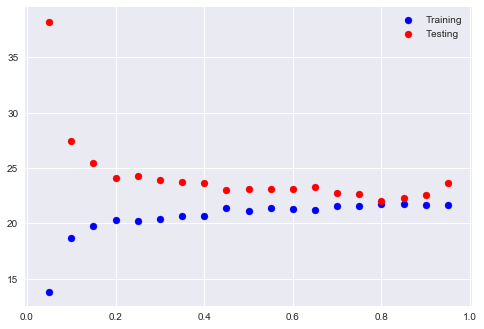

In [36]:
import numpy as np
train_mse_splits = []
test_mse_splits = []

for split in split_sizes:
    train_errors = []
    test_errors = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-split)
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        #print('Training MSE:', train_mse)
        train_errors.append(train_mse)
        #print('Testing MSE:', test_mse)
        test_errors.append(test_mse)
    train_mse_splits.append(np.mean(train_errors))
    test_mse_splits.append(np.mean(test_errors))
    
plt.style.use('seaborn')
plt.scatter(split_sizes, train_mse_splits, color='b', label='Training')
plt.scatter(split_sizes, test_mse_splits, color='r', label='Testing')
plt.legend()

In [ ]:
# The differences between the residuals' MSE decrease up to a certain 
# training/testing split (around 80%/20%) and begin to diverage after this
# point.  For this data set, it seems as if the 80/20 split yields the best
# model as training on a bigger split will lead to overfitting.  

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.